This program first opens the fits image and load the data into a variable. Afterwards, it extracts the backgorund data, find the noise, then subtract the background noise from the data using the sep.Background function suite. Afterwards. it uses the sep.extract function to find objects within the "clean" image data and highlighting those objects using matplotlib's Ellipse feature. Lastly,

In [22]:
import numpy as np
import sep
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Ellipse
import astropy
from astropy.io import fits
import fitsio

In [23]:
%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

with fits.open('hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits') as hdul:
    data = hdul[0].data

data = data.astype(data.dtype.newbyteorder('='))
bkg = sep.Background(data)
bkg_image = bkg.back()
bkg_rms = bkg.rms()
data_sub = data - bkg

objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


Mean is 0.361747.
Median is 0.030955.
Standard deviation is 9.241926.
Largest Outlier is 807.297284.
Outlier is 87.312490 standard deviations away from the mean.
While the mean and the standard deviation are really large, I think it is expected since the data set is of the fluxes of a UDF image.
Since most pixels of a UDF are pitch black, any pixels that catch flight is a significant value difference to most.
So I think these values are normal for a UDF.


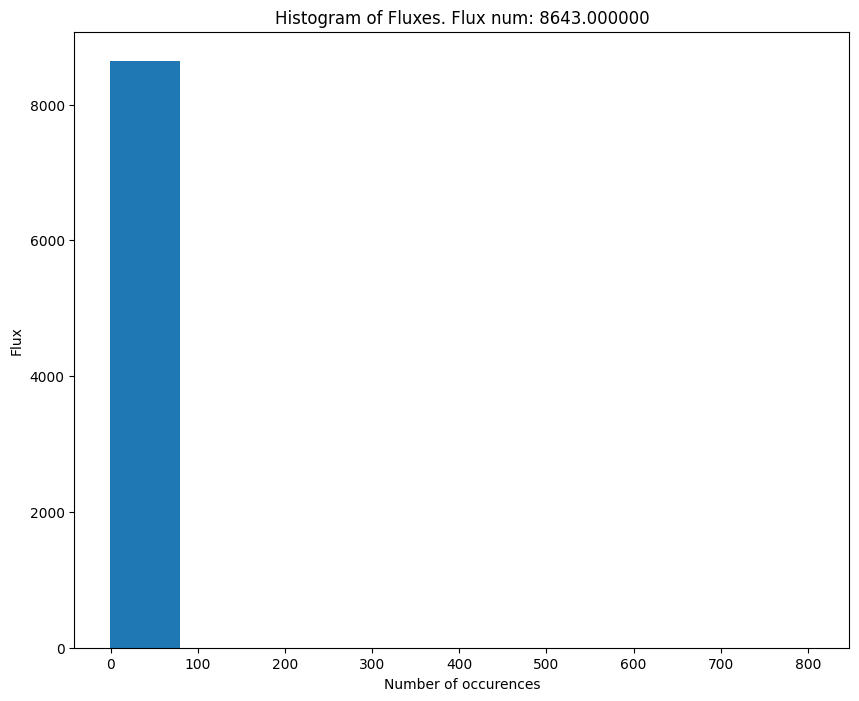

In [24]:
mean = np.mean(flux)
median = np.median(flux)
standard_devi = np.std(flux)

z_score = np.abs((flux - mean) / standard_devi)
index = np.argmax(z_score)

print("Mean is {:f}.".format(mean))
print("Median is {:f}.".format(median))
print("Standard deviation is {:f}.".format(standard_devi))
print("Largest Outlier is {:f}.".format(flux[index]))
print("Outlier is {:f} standard deviations away from the mean.".format(z_score[index]))
print("While the mean and the standard deviation are really large, I think it is expected since the data set is of the fluxes of a UDF image.")
print("Since most pixels of a UDF are pitch black, any pixels that catch flight is a significant value difference to most.")
print("So I think these values are normal for a UDF.")
#These same texts are visible in the Google Doc.

plt.ylabel("Flux")
plt.xlabel("Number of occurences")
plt.hist(flux) 
plt.title("Histogram of Fluxes. Flux num: {:f}".format(int(len(flux))))
plt.show()

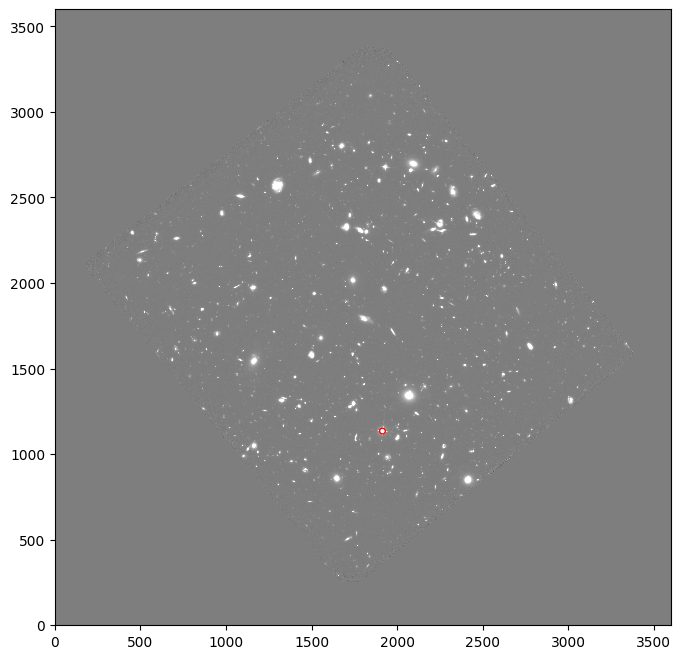

In [25]:
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

e = Ellipse(xy=(objects['x'][index], objects['y'][index]),
                width=6*objects['a'][index],
                height=6*objects['b'][index],
                angle=objects['theta'][index] * 180. / np.pi)
e.set_facecolor('none')
e.set_edgecolor('red')
ax.add_artist(e)
plt.show()

In [ ]:
with fits.open('hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits') as hdul:
    data_1 = hdul[0].data

data_1 = data_1.astype(data_1.dtype.newbyteorder('='))
bkg_1 = sep.Background(data_1)
bkg_image_1 = bkg_1.back()
bkg_rms_1 = bkg_1.rms()
data_sub_1 = data_1 - bkg_1

objects_1 = sep.extract(data_sub_1, 1.5, err=bkg_1.globalrms)

In [ ]:
with fits.open('hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits') as hdul:
    data_2 = hdul[0].data

data_2 = data_2.astype(data_2.dtype.newbyteorder('='))
bkg_2 = sep.Background(data_2)
bkg_image_2 = bkg_2.back()
bkg_rms_2 = bkg_2.rms()
data_sub_2 = data_2 - bkg_2

objects_2 = sep.extract(data_sub_2, 1.5, err=bkg_2.globalrms)